In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *
import gc
from MetaLearner import HDDOnBands
import consts
torch.cuda.empty_cache()
gc.collect()

%load_ext autoreload
%autoreload 2
%matplotlib inline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\amirb\AppData\Local\Programs\Python\Python38\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'KSC.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'KSC_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))
# X = X.reshape((512, 614, 176))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 7
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

K= 5


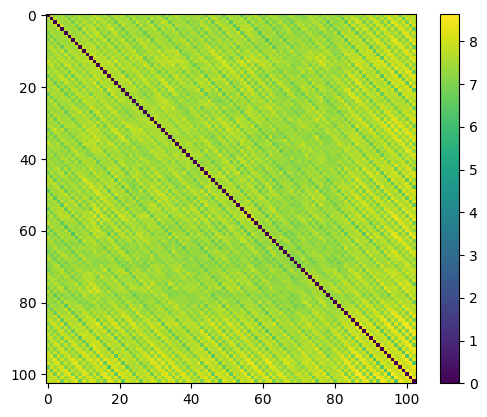

is equal?  True
K= 7


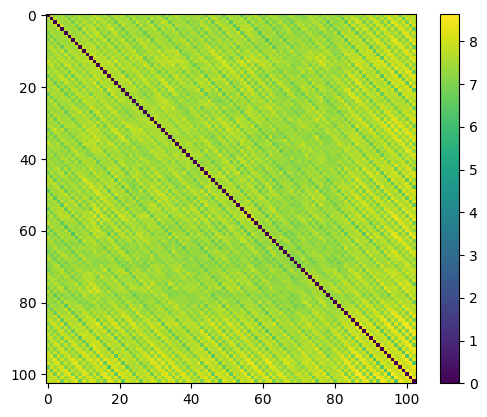

is equal?  True
K= 9


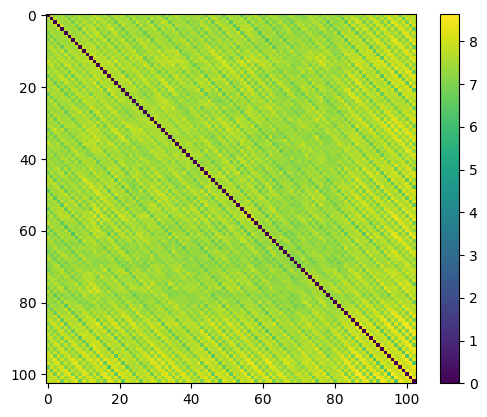

is equal?  True
K= 11


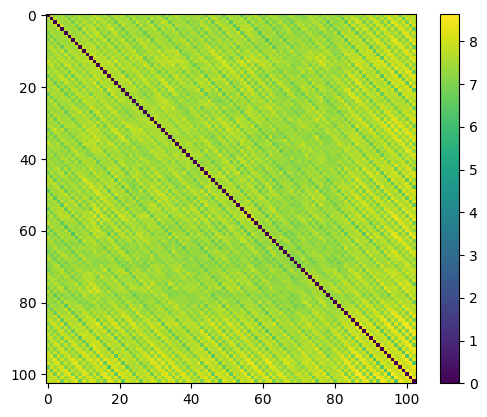

is equal?  True
K= 13


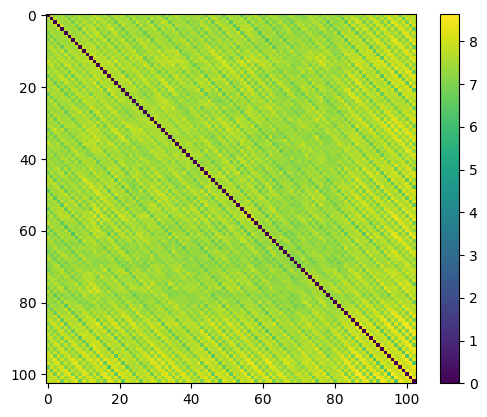

is equal?  True
K= 15


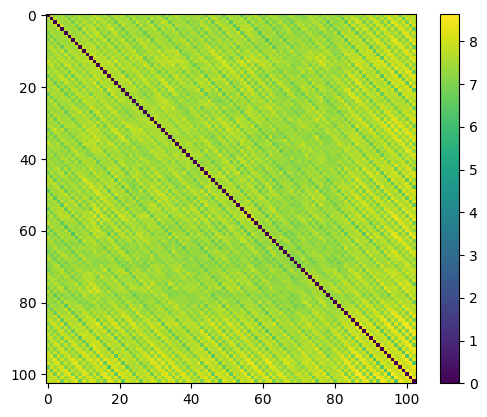

is equal?  True
K= 17


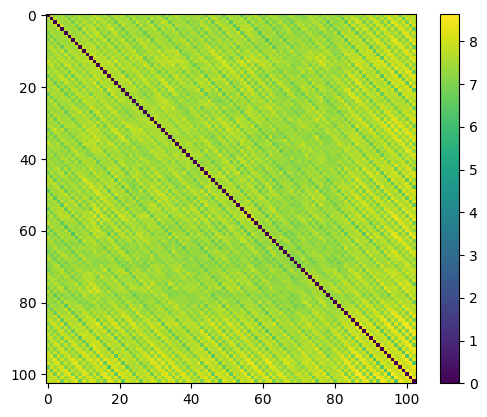

is equal?  True
K= 19


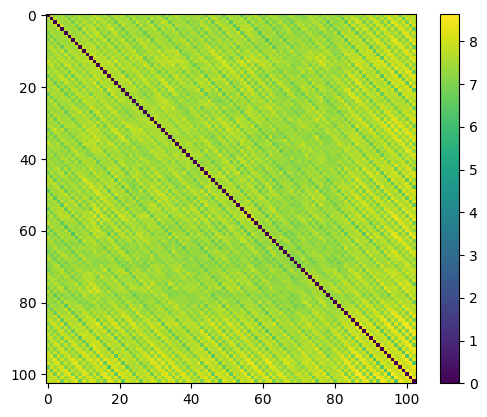

In [9]:

for val in [5,7,9,11,13,15,17,19]:
    consts.CONST_K = val
    # print("K=", consts.CONST_K)
    distances = HDDOnBands.run(X, 'cosine', factors_for_batch=None)
    if val!=5:
        print("is equal? ", np.allclose(distances, keep))
    keep = distances
    print("K=", consts.CONST_K)
    show_distances(distances)


# weights, dist_batches = HDDOnBands.createL1WeightedBatches(X, normalize=False)

# show_weights(weights, is_normalized=False)


# plot_tree(distances.cpu().numpy())

XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  0.39867687225341797
XXXXXXX IN CLASSIFICATION XXXXXXXXX
total classified:  35158
total classified:  7617
Train Accuracy:  0.8844359747425906
Test Accuracy:  0.5886832086123146


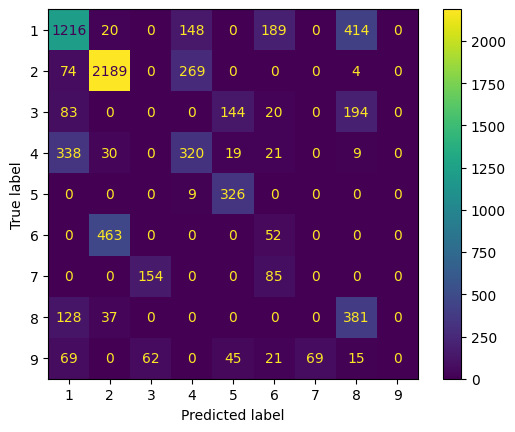

In [14]:
import gc
torch.cuda.empty_cache()
gc.collect()

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common')

confusion_mat(test_gt,test_preds, range(1,10))


TOTAL TIME FOR METHOD:  8.763011932373047
Train Accuracy:  0.8901683677920266
Test Accuracy:  0.5150250417362271


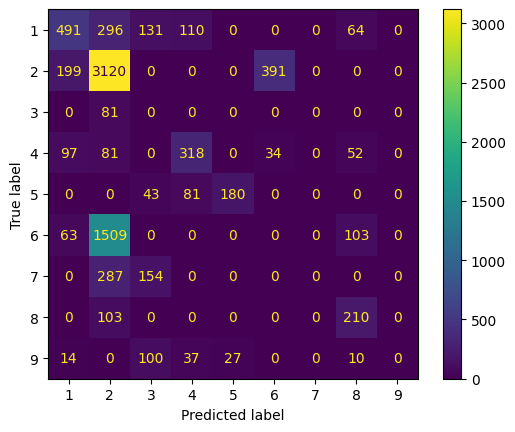

In [15]:
import gc
torch.cuda.empty_cache()
gc.collect()

weights, dist_batches = HDDOnBands.createUniformWeightedBatches(X, clusters_amount=3)

# print(dist_batches[1])

# print(dist_batches)

train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

confusion_mat(test_gt,test_preds, range(1,10))
